### 1.Import library

This cell imports all the necessary Python libraries for data analysis, visualization, and machine learning.
- `pandas`, `numpy`: For data manipulation and numerical operations.
- `matplotlib.pyplot`, `seaborn`: For data visualization.
- `joblib`: For saving and loading models or preprocessing tools.
- `scikit-learn`: For data preprocessing, model training, and evaluation.
- `xgboost`: For training a powerful gradient boosting regression model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

### 2.Load Data and check Data

This cell loads the dataset from a CSV file into a pandas DataFrame named `df`.

In [6]:
df = pd.DataFrame()
df = pd.read_csv(r'E:/Jan_2025/ML/Project/Code/Git_ML_Project/data/Data_2020_2024.csv')

In [7]:
#Checking the dataset 
df.head()

,Date,Water Station P.17 [m³/s],Water Station N.67 [m³/s],Water Station C.13 [m³/s],Rainfall TCP004 (mm),Rainfall CPY010 (mm),Rainfall 48415 (mm),Rainfall LBI001 (mm),Min_Temp,Max_Temp,relative humidity (%),Water Station C.29A (Target),State
0,1/1/2020,112,117.0,90.0,NaN,NaN,0.0,0,24.8,35.2,64.50,93.0,Normal
1,2/1/2020,99,112.0,85.0,NaN,NaN,0.0,0,23.9,35.5,66.18,91.0,Normal
2,3/1/2020,97,116.0,85.0,NaN,NaN,0.0,0.4,22.8,36.9,66.06,92.0,Normal
3,4/1/2020,88,132.0,85.0,NaN,NaN,0.0,0.6,23.6,35.4,68.75,92.0,Normal
4,5/1/2020,81,141.0,85.0,NaN,NaN,0.0,0.2,23.8,34.3,69.63,90.0,Normal


In [8]:
df.tail()

,Date,Water Station P.17 [m³/s],Water Station N.67 [m³/s],Water Station C.13 [m³/s],Rainfall TCP004 (mm),Rainfall CPY010 (mm),Rainfall 48415 (mm),Rainfall LBI001 (mm),Min_Temp,Max_Temp,relative humidity (%),Water Station C.29A (Target),State
1822,27/12/2024,316,244.0,90.0,0.0,0.0,0.0,0,25.6,36.2,60.25,181.0,Normal
1823,28/12/2024,247,252.0,90.0,0.0,0.0,0.0,0,25.5,33.1,61.00,259.0,Normal
1824,29/12/2024,281,256.0,90.0,0.0,0.0,0.0,0,23.5,33.8,58.40,254.0,Normal
1825,30/12/2024,239,268.0,90.0,0.0,0.0,0.0,0,22.3,34.3,58.69,185.0,Normal
1826,31/12/2024,292,262.0,90.0,0.0,0.0,0.0,0,20.9,32.4,57.56,287.0,Normal


In [9]:
df.describe()

,Water Station N.67 [m³/s],Water Station C.13 [m³/s],Rainfall TCP004 (mm),Rainfall CPY010 (mm),Rainfall 48415 (mm),Min_Temp,Max_Temp,relative humidity (%),Water Station C.29A (Target)
count,1801.000000,1801.000000,1705.000000,1349.000000,1826.000000,1796.000000,1796.000000,1789.000000,1792.000000
mean,322.720378,395.553026,2.485630,2.306894,3.196692,25.830624,34.426615,74.180626,476.401786
std,349.960919,667.521970,8.814861,8.015752,10.451826,1.930343,2.269562,7.711065,716.346069
min,64.000000,50.000000,0.000000,0.000000,0.000000,15.300000,24.000000,46.810000,-87.000000
25%,106.000000,70.000000,0.000000,0.000000,0.000000,24.900000,33.200000,68.850000,93.000000
50%,141.000000,80.000000,0.000000,0.000000,0.000000,26.200000,34.500000,74.460000,134.000000
75%,355.000000,236.000000,0.200000,0.000000,0.200000,27.100000,36.000000,79.600000,416.250000
max,1369.000000,3169.000000,147.200000,101.200000,136.000000,32.500000,40.800000,96.610000,3252.000000


### 3.Preprocessing

In [11]:
#Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1827 non-null   object 
 1   Water Station P.17 [m³/s]     1801 non-null   object 
 2   Water Station N.67 [m³/s]     1801 non-null   float64
 3   Water Station C.13 [m³/s]     1801 non-null   float64
 4   Rainfall TCP004 (mm)          1705 non-null   float64
 5   Rainfall CPY010 (mm)          1349 non-null   float64
 6   Rainfall 48415 (mm)           1826 non-null   float64
 7   Rainfall LBI001 (mm)          1780 non-null   object 
 8   Min_Temp                      1796 non-null   float64
 9   Max_Temp                      1796 non-null   float64
 10  relative humidity (%)         1789 non-null   float64
 11  Water Station C.29A (Target)  1792 non-null   float64
 12  State                         1827 non-null   object 
dtypes: 

Columns like `Water Station P.17 [m³/s]` and `Rainfall LBI001 (mm)` are of object type but should be numerical, likely due to the presence of non-numeric characters such as "-"

In [12]:
#Checking for missing values 
df.isna().sum()

Date                              0
Water Station P.17 [m³/s]        26
Water Station N.67 [m³/s]        26
Water Station C.13 [m³/s]        26
Rainfall TCP004 (mm)            122
Rainfall CPY010 (mm)            478
Rainfall 48415 (mm)               1
Rainfall LBI001 (mm)             47
Min_Temp                         31
Max_Temp                         31
relative humidity (%)            38
Water Station C.29A (Target)     35
State                             0
dtype: int64

Several features contain missing values, with `Rainfall CPY010 (mm)` having the most (478 missing). `Water Station P.17 [m³/s]`, `Water Station N.67 [m³/s]`, and `Water Station C.13 [m³/s]` each have 26 missing values. The target variable `Water Station C.29A (Target)` is missing in 35 entries.

In [13]:
#Checking for Duplicate Rows
df.duplicated().sum()

np.int64(0)

This means all entries in the dataset are unique, and no rows need to be removed

In [14]:
#Checking the correlation between the features
corr = df.corr(numeric_only=True)
corr

,Water Station N.67 [m³/s],Water Station C.13 [m³/s],Rainfall TCP004 (mm),Rainfall CPY010 (mm),Rainfall 48415 (mm),Min_Temp,Max_Temp,relative humidity (%),Water Station C.29A (Target)
Water Station N.67 [m³/s],1.000000,0.956712,0.189386,0.190511,0.190560,0.068265,-0.016327,0.260388,0.921709
Water Station C.13 [m³/s],0.956712,1.000000,0.162192,0.182149,0.188096,0.058401,-0.009727,0.233885,0.962229
Rainfall TCP004 (mm),0.189386,0.162192,1.000000,0.648704,0.349784,-0.055402,-0.092409,0.278874,0.138384
Rainfall CPY010 (mm),0.190511,0.182149,0.648704,1.000000,0.401554,-0.014980,-0.080614,0.308340,0.159217
Rainfall 48415 (mm),0.190560,0.188096,0.349784,0.401554,1.000000,-0.018087,-0.090897,0.280266,0.176057
Min_Temp,0.068265,0.058401,-0.055402,-0.014980,-0.018087,1.000000,0.422841,0.162923,0.032286
Max_Temp,-0.016327,-0.009727,-0.092409,-0.080614,-0.090897,0.422841,1.000000,-0.247110,-0.007332
relative humidity (%),0.260388,0.233885,0.278874,0.308340,0.280266,0.162923,-0.247110,1.000000,0.202684
Water Station C.29A (Target),0.921709,0.962229,0.138384,0.159217,0.176057,0.032286,-0.007332,0.202684,1.000000


This step calculates the Pearson correlation coefficients between all numerical features in the dataset.
- `Water Station C.13 [m³/s]` has a very strong correlation with the target variable `Water Station C.29A (Target)` (r = 0.96).
- `Water Station N.67 [m³/s]` also shows a strong correlation with the target (r = 0.92).
- Other features, such as rainfall and temperature, show weak to moderate correlation values with the target.
- Temperature (`Max_Temp`, `Min_Temp`) and humidity have low or even negative correlations with most features.

In [15]:
df.columns

Index(['Date', 'Water Station P.17 [m³/s] ', 'Water Station N.67 [m³/s] ',
       'Water Station C.13 [m³/s] ', 'Rainfall TCP004 (mm)',
       'Rainfall CPY010 (mm)', 'Rainfall 48415 (mm)', 'Rainfall LBI001 (mm)',
       'Min_Temp', 'Max_Temp', 'relative humidity (%)',
       'Water Station C.29A (Target)', 'State'],
      dtype='object')

We remove the 'Date' column from the dataset. The date column is not directly useful for modeling in its raw form.

In [16]:
#Dropping the date column
df.drop('Date',axis=1,inplace=True)

In [17]:
#Checking the new dataset after dropping the date column
df.head()

,Water Station P.17 [m³/s],Water Station N.67 [m³/s],Water Station C.13 [m³/s],Rainfall TCP004 (mm),Rainfall CPY010 (mm),Rainfall 48415 (mm),Rainfall LBI001 (mm),Min_Temp,Max_Temp,relative humidity (%),Water Station C.29A (Target),State
0,112,117.0,90.0,NaN,NaN,0.0,0,24.8,35.2,64.50,93.0,Normal
1,99,112.0,85.0,NaN,NaN,0.0,0,23.9,35.5,66.18,91.0,Normal
2,97,116.0,85.0,NaN,NaN,0.0,0.4,22.8,36.9,66.06,92.0,Normal
3,88,132.0,85.0,NaN,NaN,0.0,0.6,23.6,35.4,68.75,92.0,Normal
4,81,141.0,85.0,NaN,NaN,0.0,0.2,23.8,34.3,69.63,90.0,Normal


In [18]:
#Getting the cat and num values 
cat=[] #categorical values
num=[] #numerical values
for i in df:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [19]:
#Checking categorical values
cat

['Water Station P.17 [m³/s] ', 'Rainfall LBI001 (mm)', 'State']

In [20]:
#Checking numerical values
num

['Water Station N.67 [m³/s] ',
 'Water Station C.13 [m³/s] ',
 'Rainfall TCP004 (mm)',
 'Rainfall CPY010 (mm)',
 'Rainfall 48415 (mm)',
 'Min_Temp',
 'Max_Temp',
 'relative humidity (%)',
 'Water Station C.29A (Target)']

We fix the data types of two columns that were incorrectly loaded as `object` due to the presence of '-' as placeholders for missing values.

In [21]:
#Fixing the data types of 'Water Station P.17 and Rainfall P.17' columns
df['Water Station P.17 [m³/s] '] = df['Water Station P.17 [m³/s] '].replace('-', np.nan).astype('float64')
df['Rainfall LBI001 (mm)']=df['Rainfall LBI001 (mm)'].replace('-', np.nan).astype('float64')

In [22]:
#Checking the new dataset after fixing the data types
df.dtypes

Water Station P.17 [m³/s]       float64
Water Station N.67 [m³/s]       float64
Water Station C.13 [m³/s]       float64
Rainfall TCP004 (mm)            float64
Rainfall CPY010 (mm)            float64
Rainfall 48415 (mm)             float64
Rainfall LBI001 (mm)            float64
Min_Temp                        float64
Max_Temp                        float64
relative humidity (%)           float64
Water Station C.29A (Target)    float64
State                            object
dtype: object

All data types are now correctly defined.

In [23]:
#Handling missing values
for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)
    else:
        me=df[i].mean()
        df[i]=df[i].fillna(me)

This loop fills in the missing values based on the data type of each column:
- For categorical features (object type), missing values are filled with the most frequent value (mode).
- For numerical features, missing values are filled with the mean of the column.

In [24]:
#Checking the missing values after handling them
df.isna().sum()

Water Station P.17 [m³/s]       0
Water Station N.67 [m³/s]       0
Water Station C.13 [m³/s]       0
Rainfall TCP004 (mm)            0
Rainfall CPY010 (mm)            0
Rainfall 48415 (mm)             0
Rainfall LBI001 (mm)            0
Min_Temp                        0
Max_Temp                        0
relative humidity (%)           0
Water Station C.29A (Target)    0
State                           0
dtype: int64

All columns now have 0 missing values. The dataset is fully complete and ready for further preprocessing, feature selection, or model training.

In [25]:
#Checking the new dataset
df.head()

,Water Station P.17 [m³/s],Water Station N.67 [m³/s],Water Station C.13 [m³/s],Rainfall TCP004 (mm),Rainfall CPY010 (mm),Rainfall 48415 (mm),Rainfall LBI001 (mm),Min_Temp,Max_Temp,relative humidity (%),Water Station C.29A (Target),State
0,112.0,117.0,90.0,2.48563,2.306894,0.0,0.0,24.8,35.2,64.50,93.0,Normal
1,99.0,112.0,85.0,2.48563,2.306894,0.0,0.0,23.9,35.5,66.18,91.0,Normal
2,97.0,116.0,85.0,2.48563,2.306894,0.0,0.4,22.8,36.9,66.06,92.0,Normal
3,88.0,132.0,85.0,2.48563,2.306894,0.0,0.6,23.6,35.4,68.75,92.0,Normal
4,81.0,141.0,85.0,2.48563,2.306894,0.0,0.2,23.8,34.3,69.63,90.0,Normal


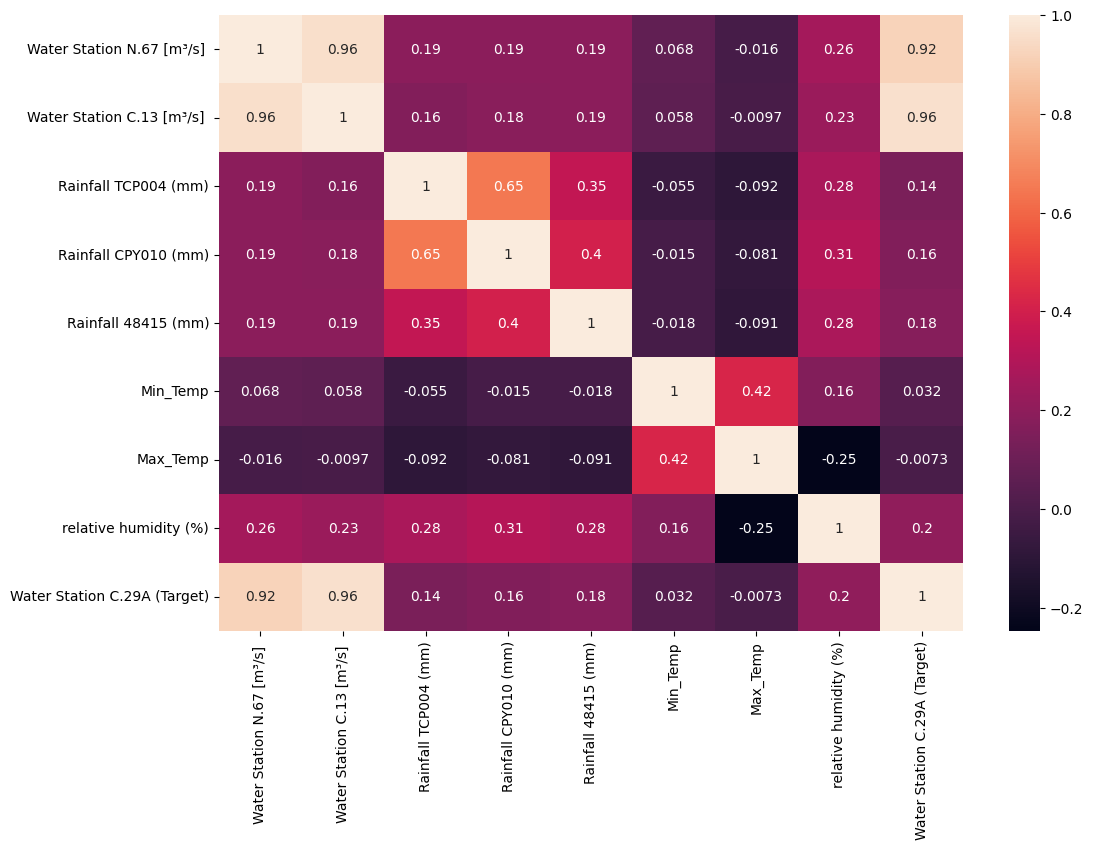

In [26]:
#Performing EDA
#Checking the heatmap for the distribution of the data
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()

This heatmap visualizes the Pearson correlation coefficients between numerical features in the dataset. Each cell shows how strongly two variables are linearly related (values range from -1 to 1).

- `Water Station C.13 [m³/s]` has a very high correlation with the target variable `Water Station C.29A (Target)` (r = 0.96), indicating it is a strong predictor.
- `Water Station N.67 [m³/s]` also shows a strong correlation with the target (r = 0.92).
- Rainfall stations (`TCP004`, `CPY010`, `48415`) show moderate correlations with each other, but only weak correlations with the target variable (around 0.14–0.18).
- Temperature variables (`Min_Temp`, `Max_Temp`) and `relative humidity (%)` show very weak or no correlation with the target.
- Negative correlations are present between `Max_Temp` and both humidity and some rainfall stations.

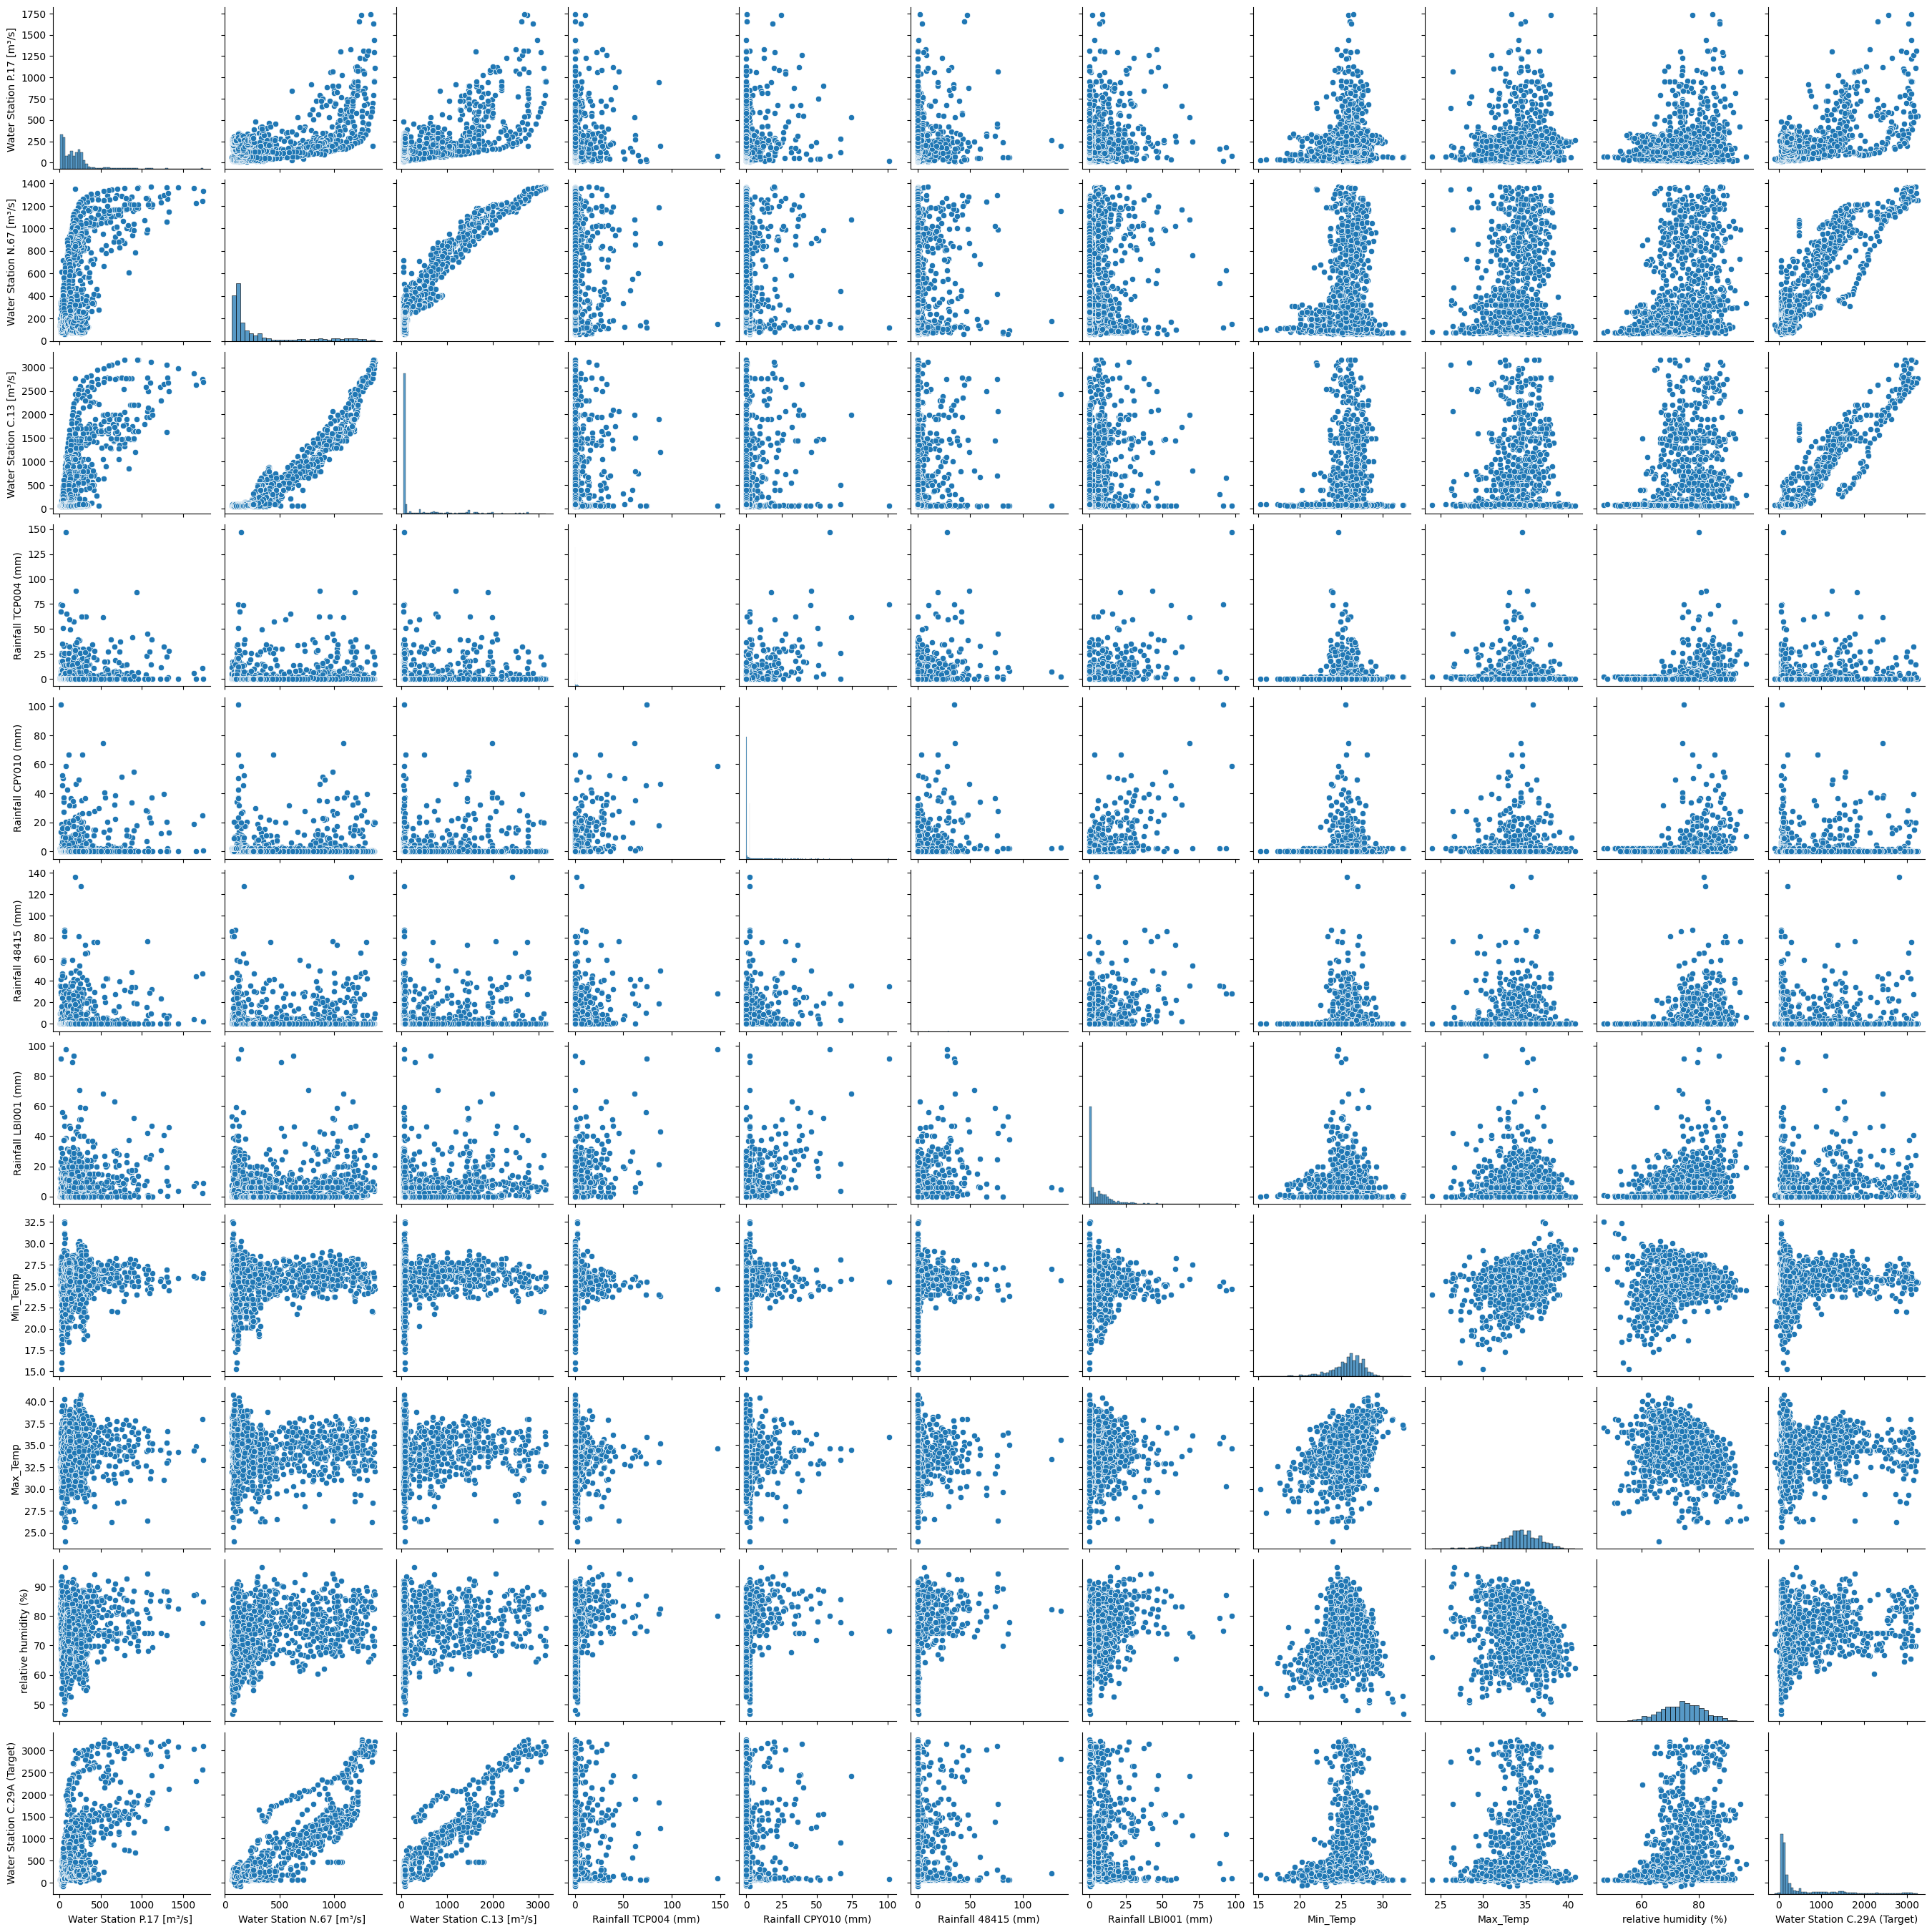

In [27]:
#Checking the pairplot for the distribution of the data
sns.pairplot(df)
plt.show()

- Strong positive linear relationships can be clearly seen between:
    - `Water Station C.13` and `Water Station C.29A (Target)`
    - `Water Station N.67` and the target
- Some variables (especially rainfall and temperature) show nonlinear or weak relationships, appearing more scattered.
- Histograms show that:
    - Several variables, like rainfall, have right-skewed distributions (many low values with a few high peaks).
    - Temperature and humidity are more normally distributed.

C:\Users\black\AppData\Local\Temp\ipykernel_22624\192940953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="State", y=col, data=df, palette='Set2')
C:\Users\black\AppData\Local\Temp\ipykernel_22624\192940953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="State", y=col, data=df, palette='Set2')
C:\Users\black\AppData\Local\Temp\ipykernel_22624\192940953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="State", y=col, data=df, palette='Set2')
C:\Users\black\AppData\Local\Temp\ipykernel_22624\192940953.py:5: FutureWarning: 


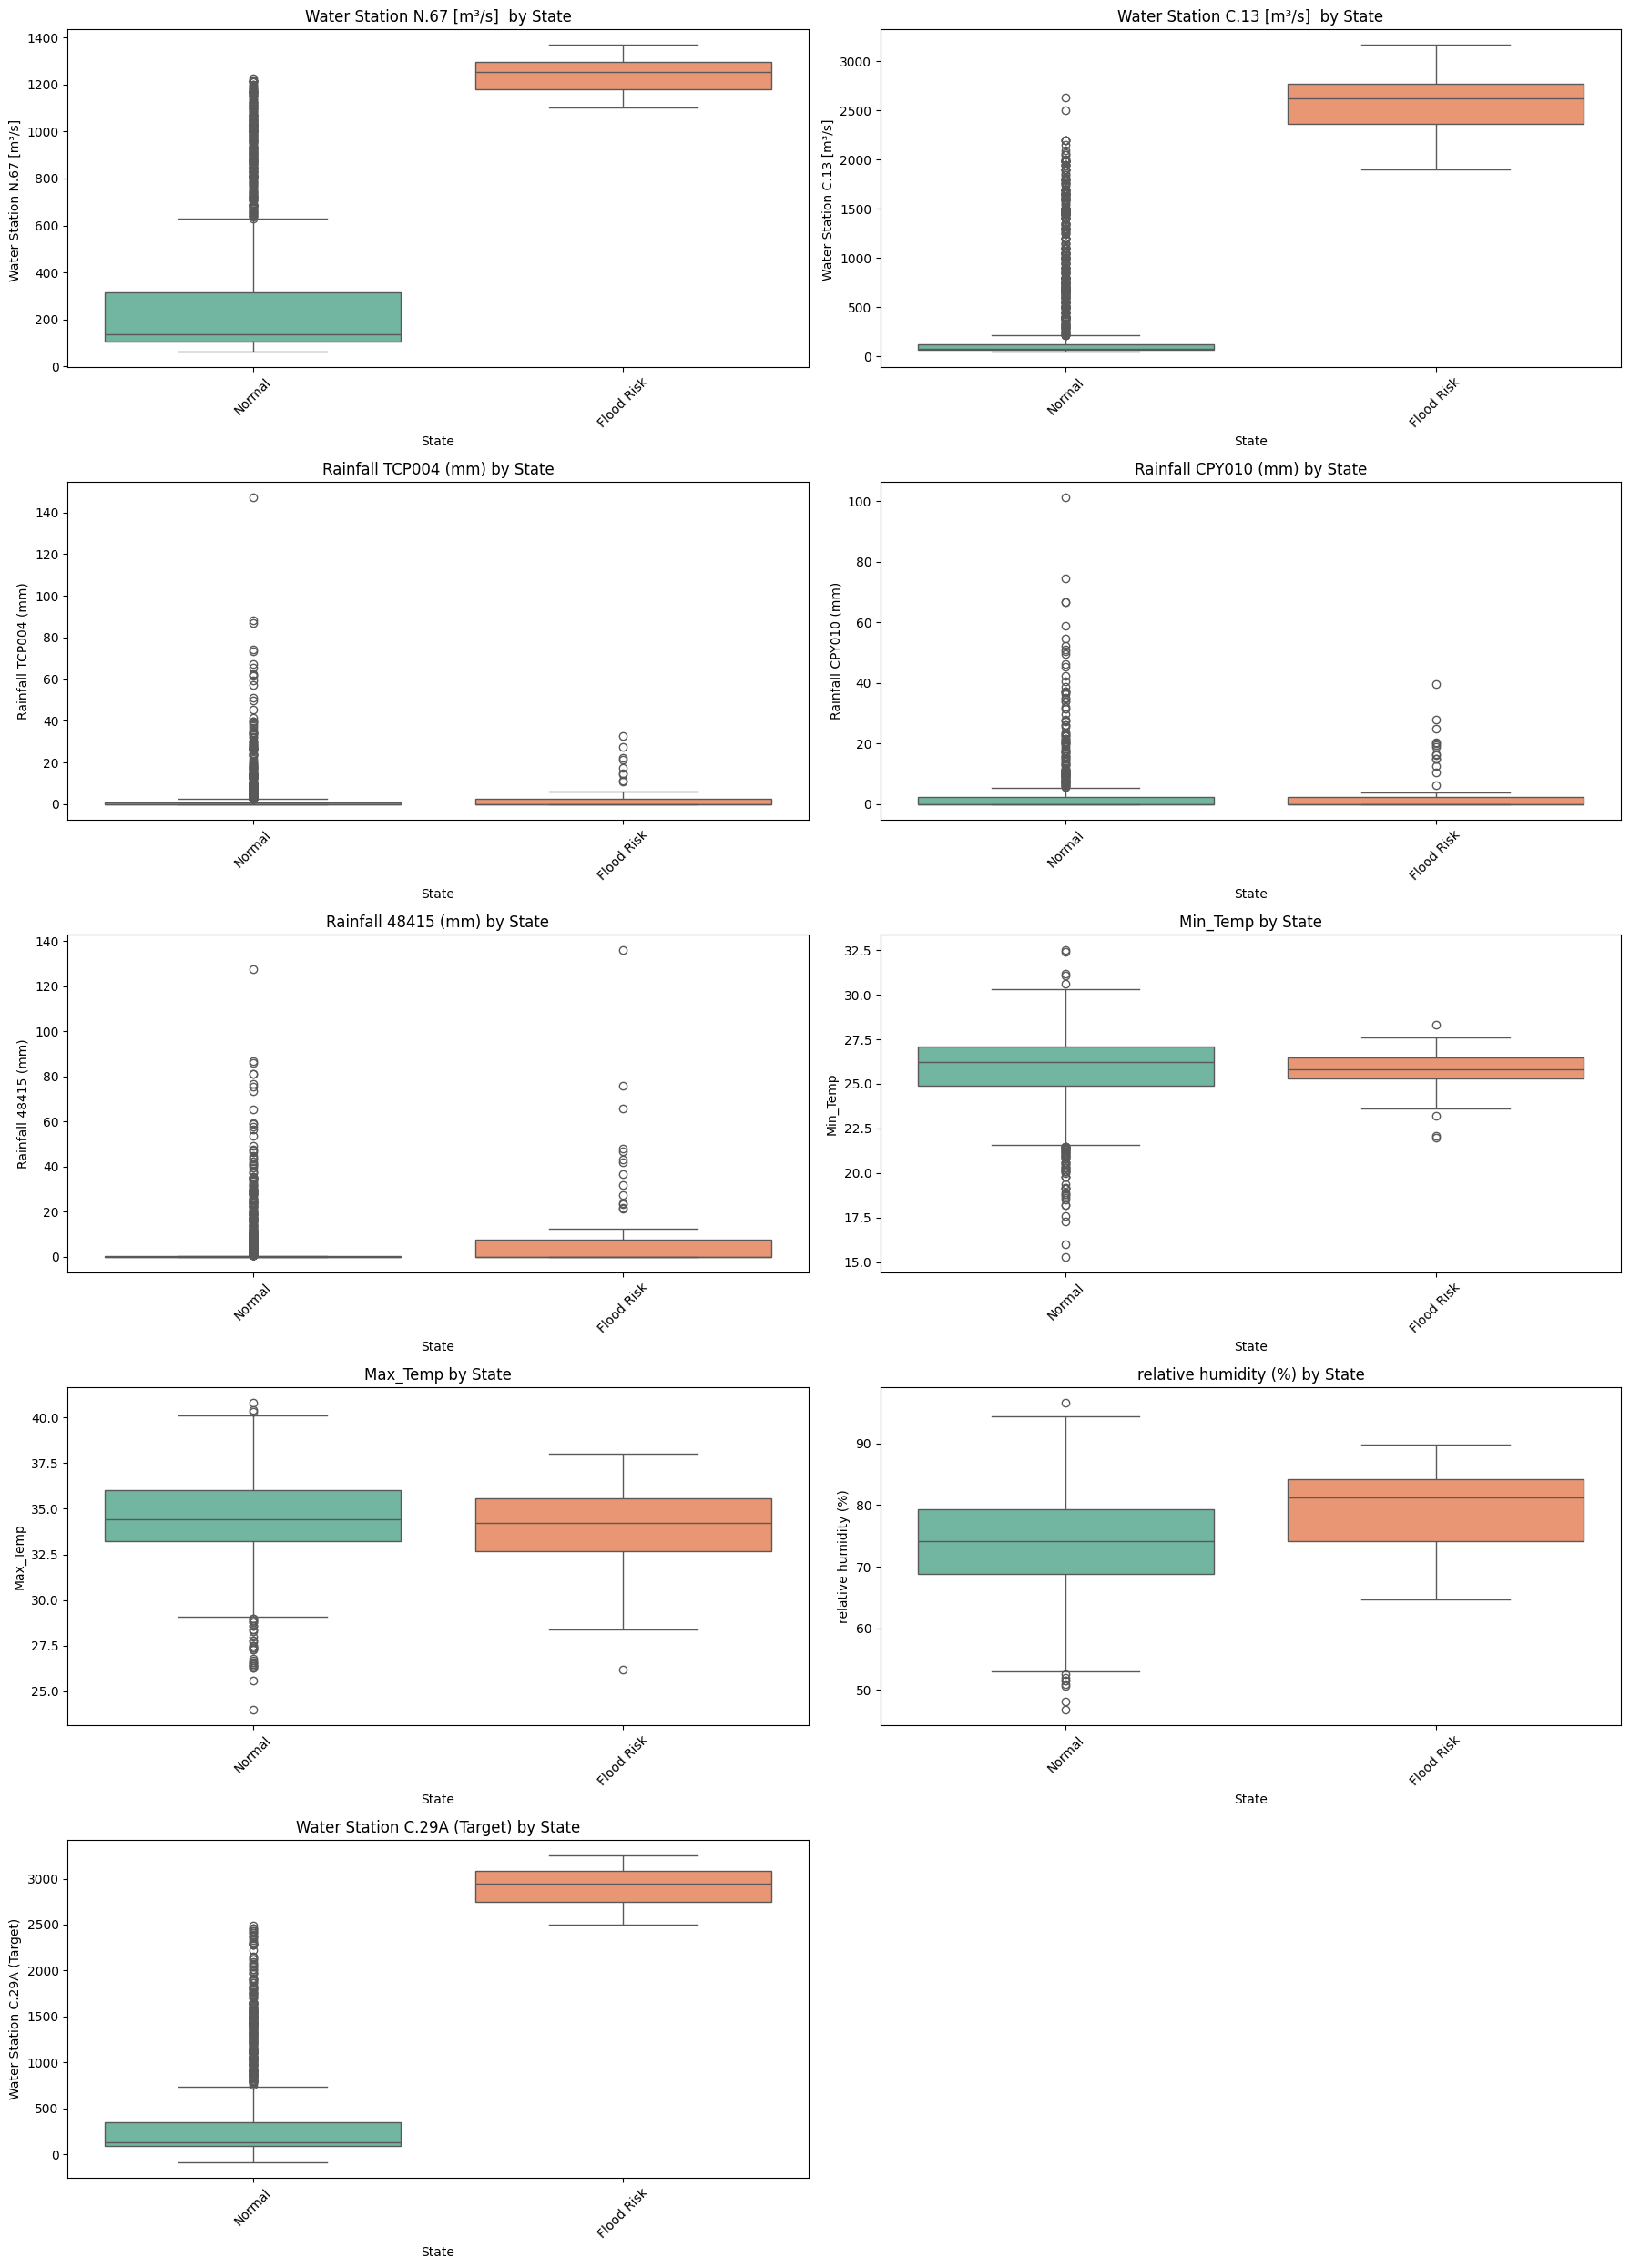

In [28]:
#State-wise Boxplots for Key Features 
plt.figure(figsize=(18, 25))
for i, col in enumerate(num, 1):
    plt.subplot((len(num) + 1) // 2, 2, i)
    sns.boxplot(x="State", y=col, data=df, palette='Set2')
    plt.title(f'{col} by State')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

This visualization compares the distribution of key numerical features between two states: Normal and Flood Risk.
- `Water Station C.13`, `N.67`, and the target variable C.29A all show significantly higher values in the Flood Risk state, suggesting they are strong indicators of flood conditions.
- Rainfall variables also show slightly higher values in the Flood Risk group, though with many outliers and wide distributions.
- Temperature variables (Min_Temp, Max_Temp) show small but noticeable differences between the two states.
- `Relative humidity (%)` tends to be higher in the Flood Risk state, which may indicate more moisture in the air during those periods.

C:\Users\black\AppData\Local\Temp\ipykernel_22624\2632911844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df, palette='pastel')


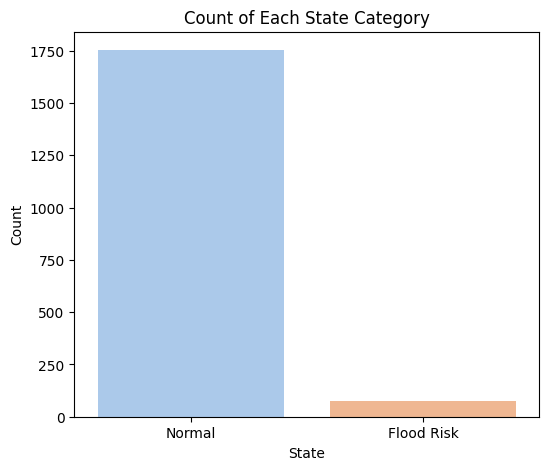

In [29]:
#Bar Plot: Count of Each State 
plt.figure(figsize=(6, 5))
sns.countplot(x='State', data=df, palette='pastel')
plt.title("Count of Each State Category")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

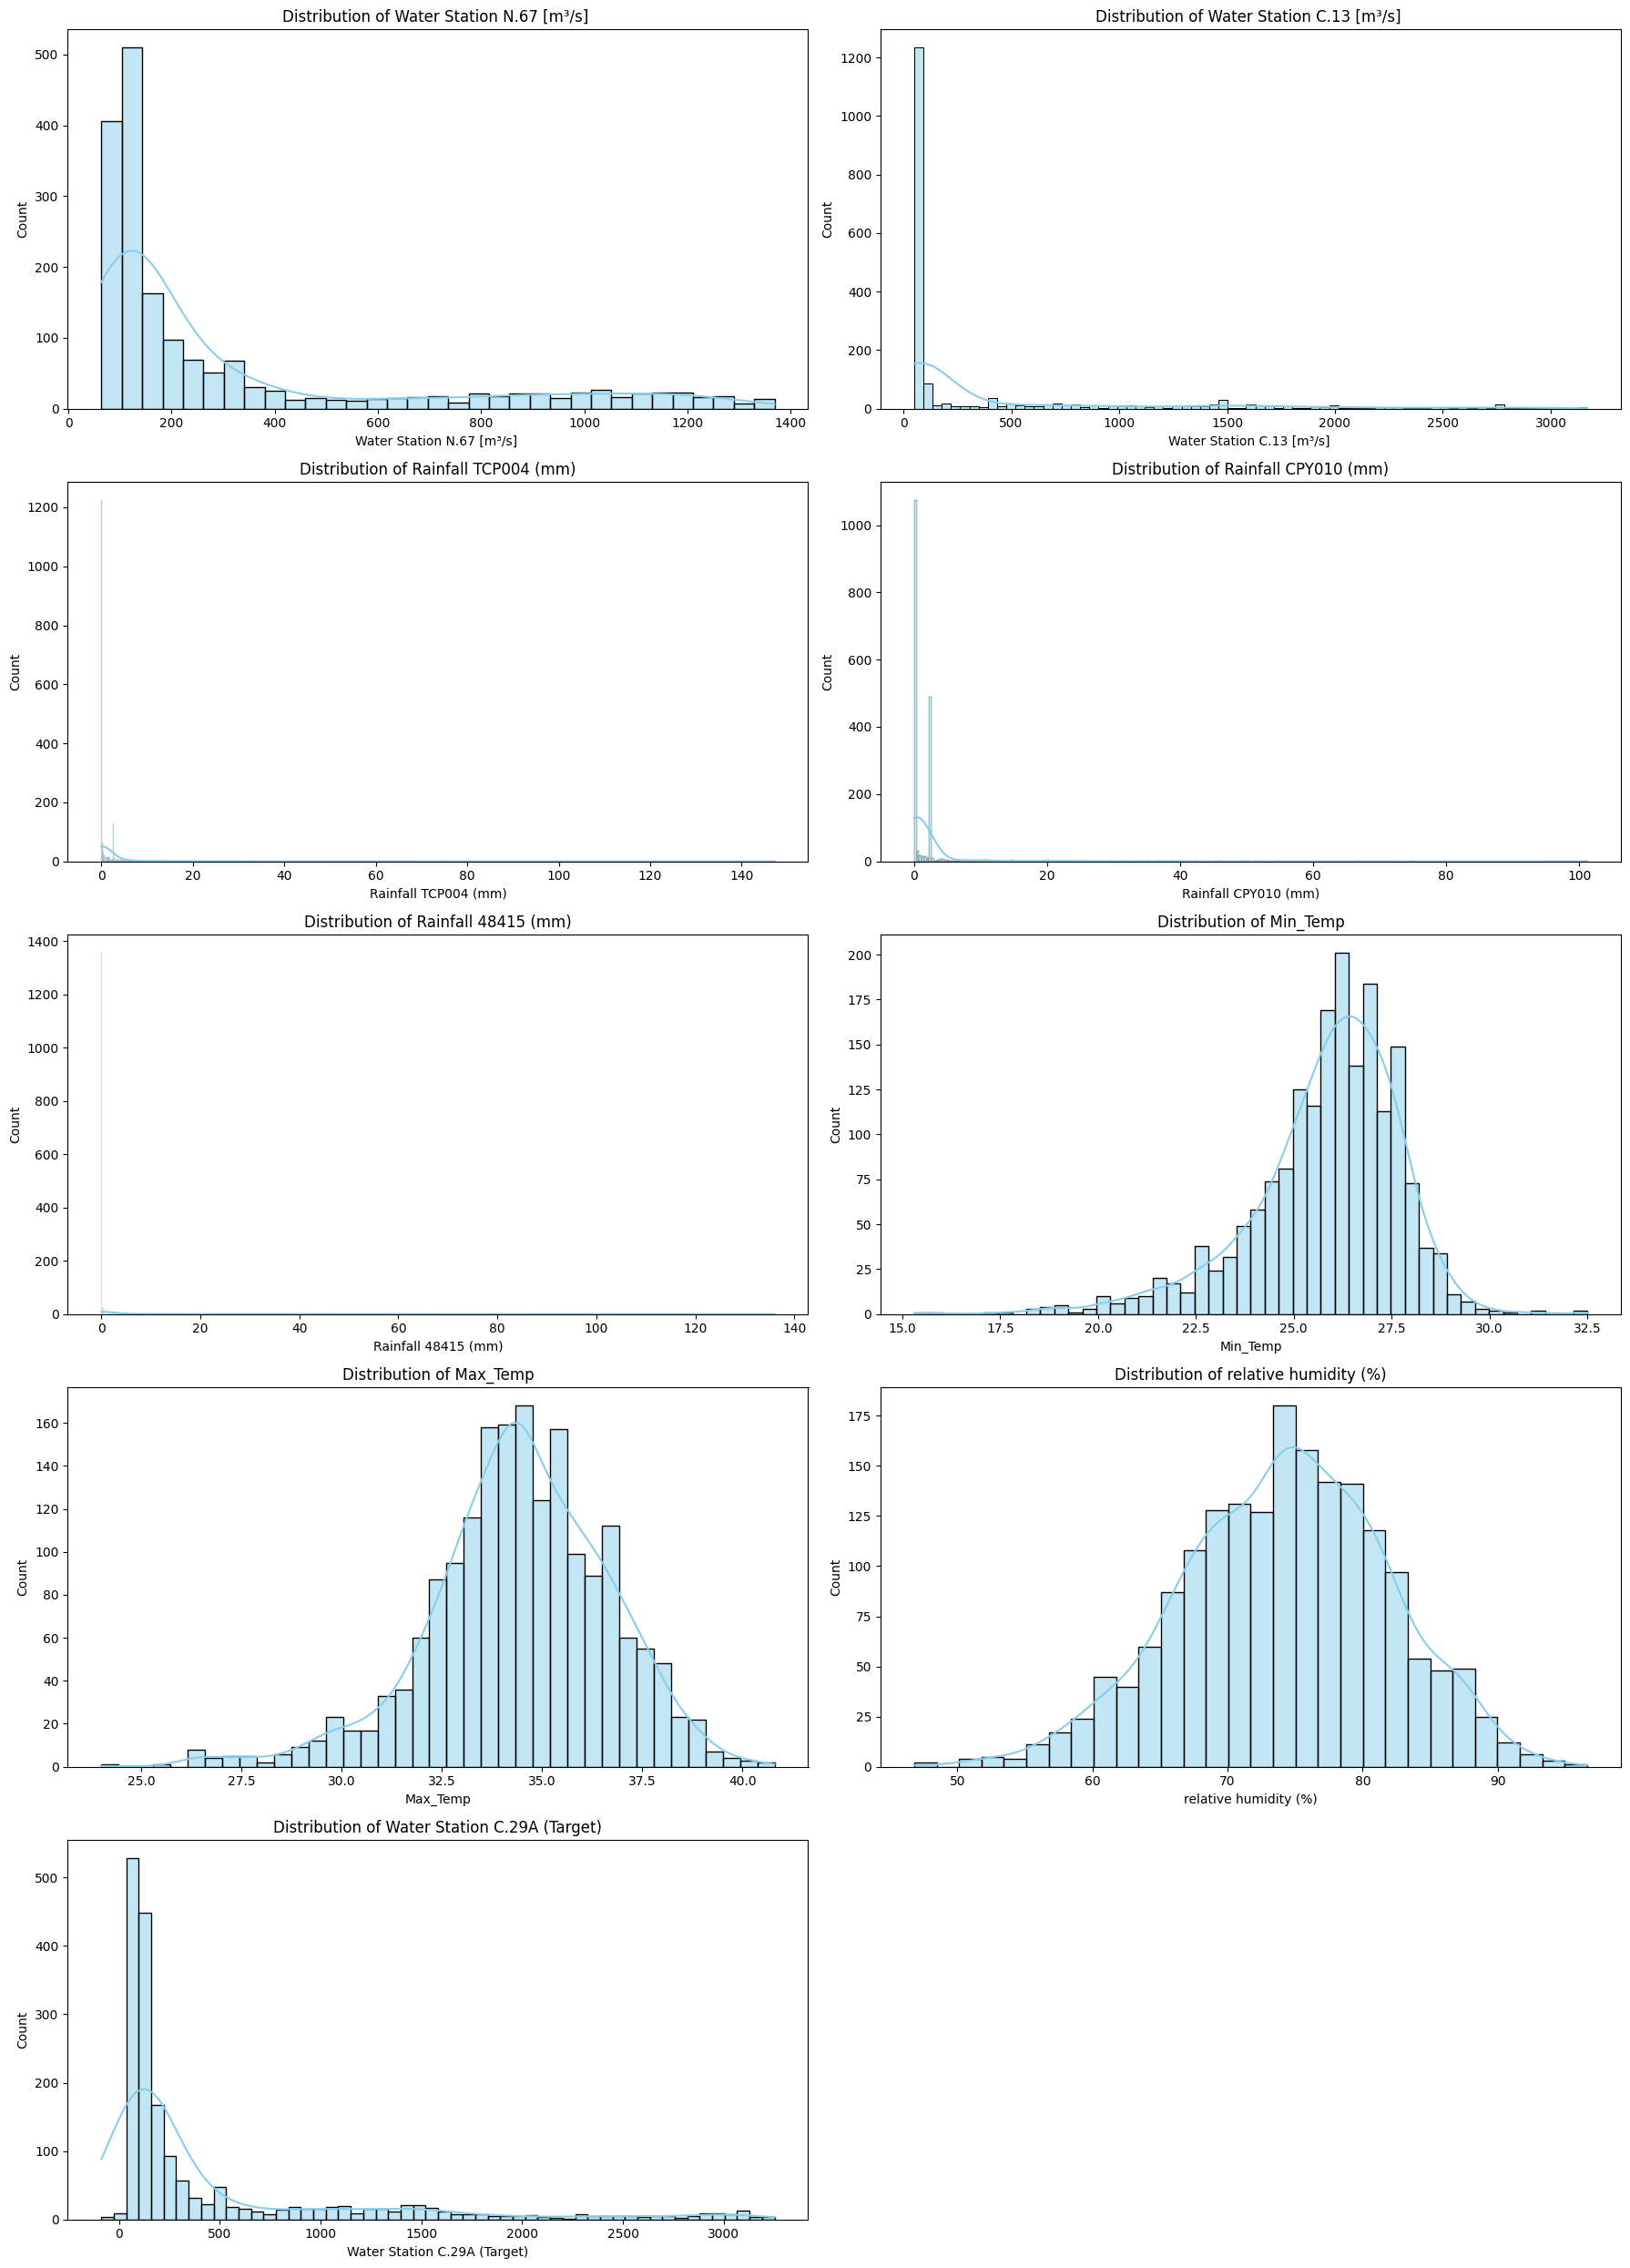

In [30]:
#  Histograms with KDE for visualizing Distributions of Numerical Features
plt.figure(figsize=(18, 25))
for i, col in enumerate(num, 1):
    plt.subplot((len(num) + 1) // 2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

The histograms with KDE (Kernel Density Estimation) curves show the distribution patterns of each numerical feature. Most variables, such as water flow and rainfall, are highly right-skewed, indicating that extreme values occur but are rare. These include `Water Station C.13`, `N.67`, and all rainfall variables. In contrast, features like `Min_Temp`, `Max_Temp`, and `relative humidity (%)` exhibit near-normal distributions, suggesting consistent weather conditions. The target variable, `Water Station C.29A (Target)`, is also right-skewed, similar to its strongly correlated predictors.

### 4.Data preparation before model training

- X: the input features used for prediction, excluding the target and the State column.
- y: the target variable, which is the water discharge at Station C.29A.

In [31]:
#Getting the target variables 
#Separating the features and target
X = df.drop(columns=['Water Station C.29A (Target)', 'State'])
y = df['Water Station C.29A (Target)']

In [32]:
#Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

Missing values in each column are replaced with the mean value of that column.

In [33]:
#Scale the data and Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [34]:
#Saving the imputer and scaler objects for future use
joblib.dump(imputer, "imputer.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### 5.Train models and evaluate results

The dataset was split into training and testing sets using an 80/20 ratio. A fixed random seed (random_state=42) was used to ensure that the split is reproducible.

In [35]:
#Performing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1461, 10), (366, 10), (1461,), (366,))

In [36]:
#Using three different models for prediction
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}
results = {}
best_model = None
best_score = -np.inf

for name, model in models.items():
    if name == "XGBoost":
        model.fit(np.array(X_train), np.array(y_train))
        preds = model.predict(np.array(X_test))
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results[name] = {"rmse": rmse, "r2": r2}
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")
    
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name

LinearRegression: RMSE = 158.37, R² = 0.9302
RandomForest: RMSE = 128.21, R² = 0.9542
XGBoost: RMSE = 116.02, R² = 0.9625


Three different regression models were trained and evaluated: Linear Regression, Random Forest, and XGBoost Regressor. Each model was fitted on the training data and tested using the test set. The performance was assessed using Root Mean Squared Error (RMSE) and R² Score. Among the models, XGBoost performed the best with the lowest RMSE of 116.02 and the highest R² score of 0.9625, indicating strong predictive accuracy. Random Forest also performed well, while Linear Regression had the lowest performance among the three.

In [37]:
#Saving the best model
joblib.dump(best_model, f"{best_model_name}_model.pkl")
print(f"Best model ({best_model_name}) saved as {best_model_name}_model.pkl")

Best model (XGBoost) saved as XGBoost_model.pkl
